In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Generacion de dato sinteticos

In [22]:
# Definir una semilla
np.random.seed(42)

# Dataset 1: Datos polinómicos
X_poly = np.linspace(0, 10, 100).reshape(-1, 1)
y_poly = 3 * (X_poly**3) - 5 * (X_poly**2) + 2 * X_poly + 10 + np.random.normal(0, 20, X_poly.shape)

#Dataset 2: Función trigonométrica. 
X_trig = np.linspace(0, 4 * np.pi, 100).reshape(-1, 1)
y_trig = np.sin(X_trig) + np.random.normal(0, 0.2, X_trig.shape)

# Dataset 3: Tienda retail -> Ventas a lo largo de un año.
# Añadiremos picos en fechas especial.
days = np.arange(1, 366).reshape(-1, 1)

# Simular ventas.
y_retail = 100 + 10 * np.sin(2 * np.pi * (days - 80) / 365)
y_retail += 25 * np.exp(-0.01 * (days - 330)**2) # Pico navideño
y_retail += 20 * np.exp(-0.01 * (days - 270)**2) # Pico navideño
y_retail += np.random.normal(0, 5, days.shape)

Text(0, 0.5, 'Ventas Diarias')

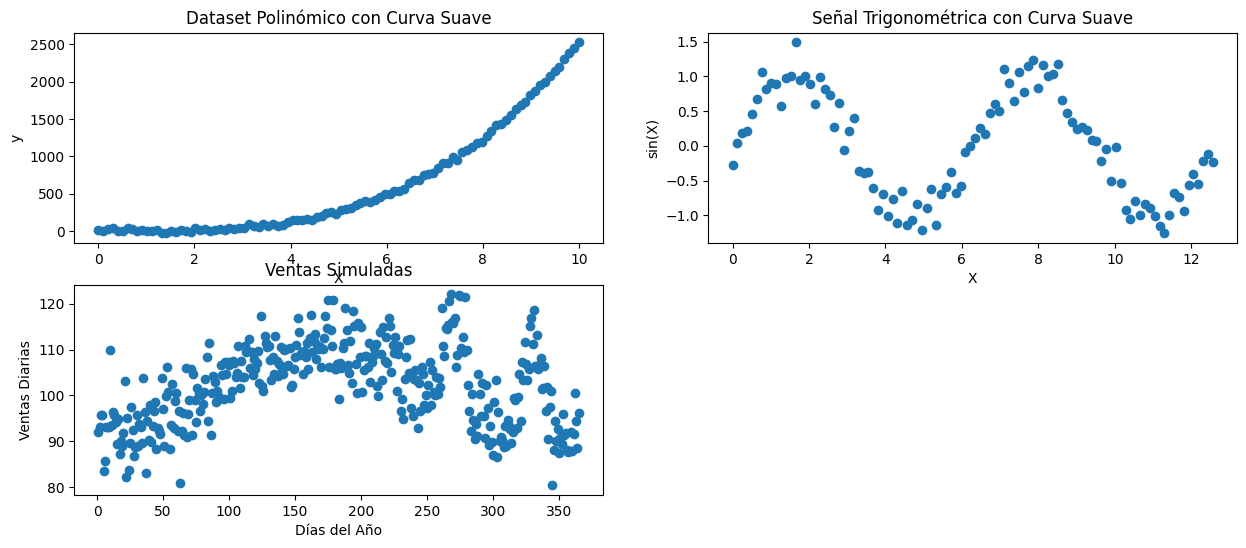

In [32]:
# Graficamos.
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
# Visualización del dataset polinómico
plt.scatter(X_poly, y_poly,)
plt.title('Dataset Polinómico con Curva Suave')
plt.xlabel('X')
plt.ylabel('y')
# Visualización del dataset trigonométrico
plt.subplot(2, 2, 2)
plt.scatter(X_trig, y_trig, )  # Datos reales con ruido
plt.title('Señal Trigonométrica con Curva Suave')
plt.xlabel('X')
plt.ylabel('sin(X)')
# Visualización del nuevo dataset de ventas realistas con curva polinómica
plt.subplot(2, 2, 3)
plt.scatter(days, y_retail,)  # Datos reales con picos en fechas específicas
plt.title('Ventas Simuladas')
plt.xlabel('Días del Año')
plt.ylabel('Ventas Diarias')

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error, r2_score

grado = 2

model = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
model.fit(X_poly, y_poly)

model_l = LinearRegression()
model_l.fit(X_poly, y_poly)

y_poly_p = model.predict(X_poly)
y_poly_l = model_l.predict(X_poly)

print(" Modelo Lineal ".center(35, "*"))
print(f"RMSE: {root_mean_squared_error(y_poly, y_poly_l)}")
print(f"R^2: {r2_score(y_poly, y_poly_l)}")
print(" Modelo Lineal ".center(35, "*"))
print(f"RMSE: {root_mean_squared_error(y_poly, y_poly_p)}")
print(f"R^2: {r2_score(y_poly, y_poly_p)}")


********** Modelo Lineal **********
RMSE: 310.5450789031829
R^2: 0.8145050324937972
********** Modelo Lineal **********
RMSE: 57.18531052477853
R^2: 0.9937099833350116


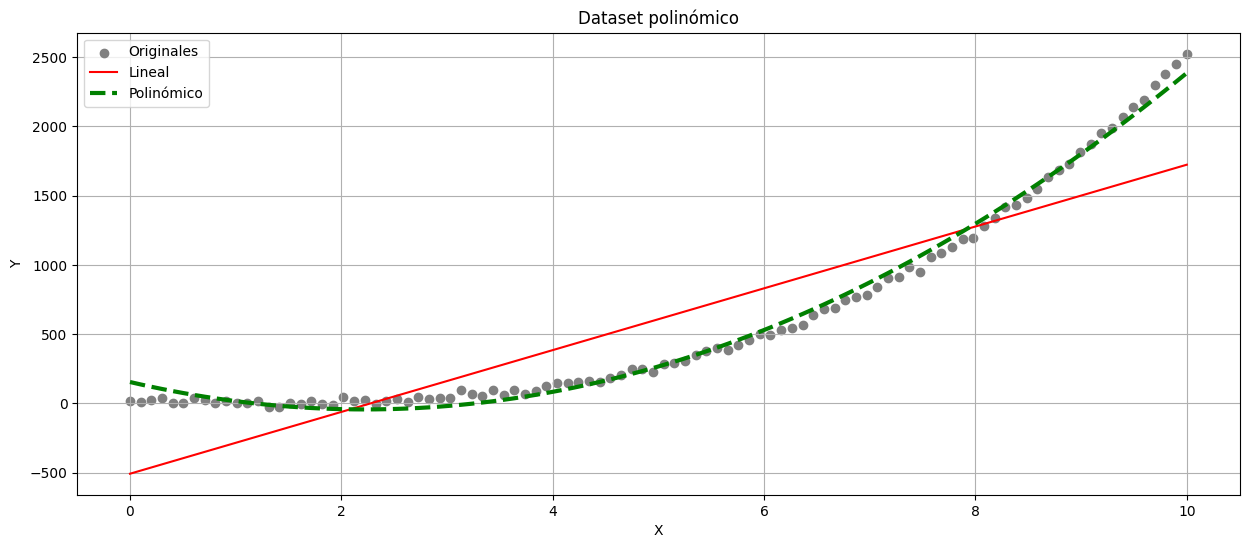

In [25]:
plt.figure(figsize=(15, 6))

plt.scatter(X_poly, y_poly, color="gray", label="Originales")
plt.plot(X_poly, y_poly_l, color="r", linestyle="-", label="Lineal") # Modelo Lineal
plt.plot(X_poly, y_poly_p, color="g", linestyle="--", linewidth=3, label="Polinómico")
plt.title("Dataset polinómico")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend();

Trigonometrico

In [26]:
grado = 3
model_p = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
model_p.fit(X_trig, y_trig)

model_l = LinearRegression()
model_l.fit(X_trig, y_trig)

y_pred_p = model_p.predict(X_trig)
y_pred_l = model_l.predict(X_trig)

print(" Modelo Lineal ".center(45, "*"))
print(f"RMSE: {root_mean_squared_error(y_trig, y_pred_l)}")
print(f"R^2: {r2_score(y_trig, y_pred_l)}")
print(" Modelo Lineal ".center(45, "*"))
print(f"RMSE: {root_mean_squared_error(y_trig, y_pred_p)}")
print(f"R^2: {r2_score(y_trig, y_pred_p)}")

*************** Modelo Lineal ***************
RMSE: 0.7038597604891802
R^2: 0.12715888402811049
*************** Modelo Lineal ***************
RMSE: 0.6564279534926089
R^2: 0.24083346627231694


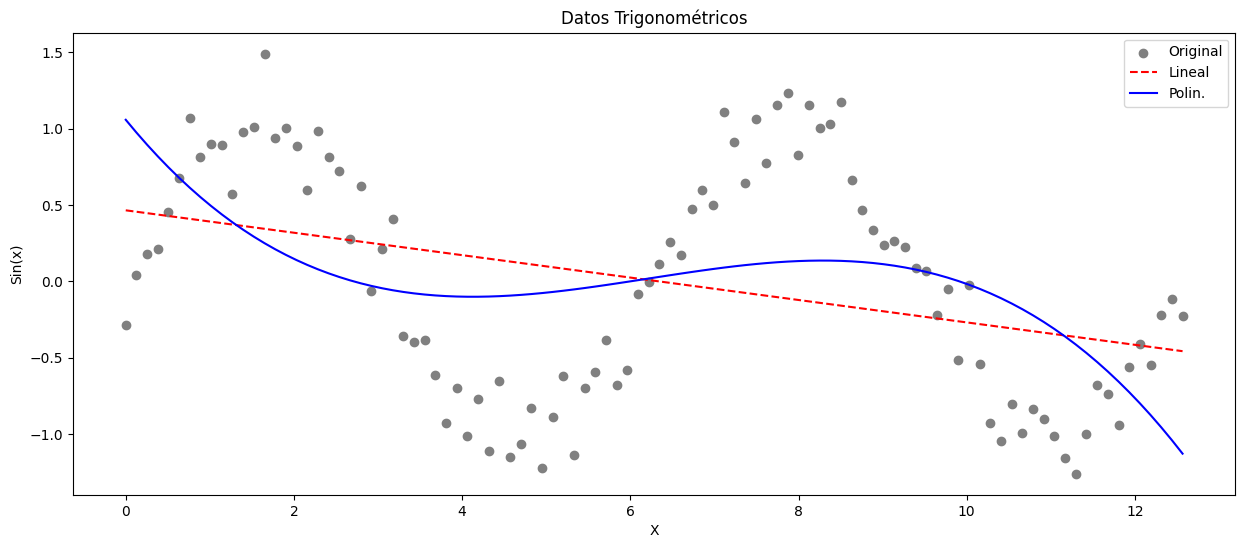

In [27]:
# Graficar
plt.figure(figsize=(15, 6))

# Visualizacion
plt.scatter(X_trig, y_trig, color="gray", label="Original")
plt.plot(X_trig, y_pred_l, color="r", linestyle="--", label="Lineal")
plt.plot(X_trig, y_pred_p, color="b", linestyle="-", label="Polin.")
plt.title("Datos Trigonométricos")
plt.xlabel("X")
plt.ylabel("Sin(x)")
plt.legend()
plt.show()

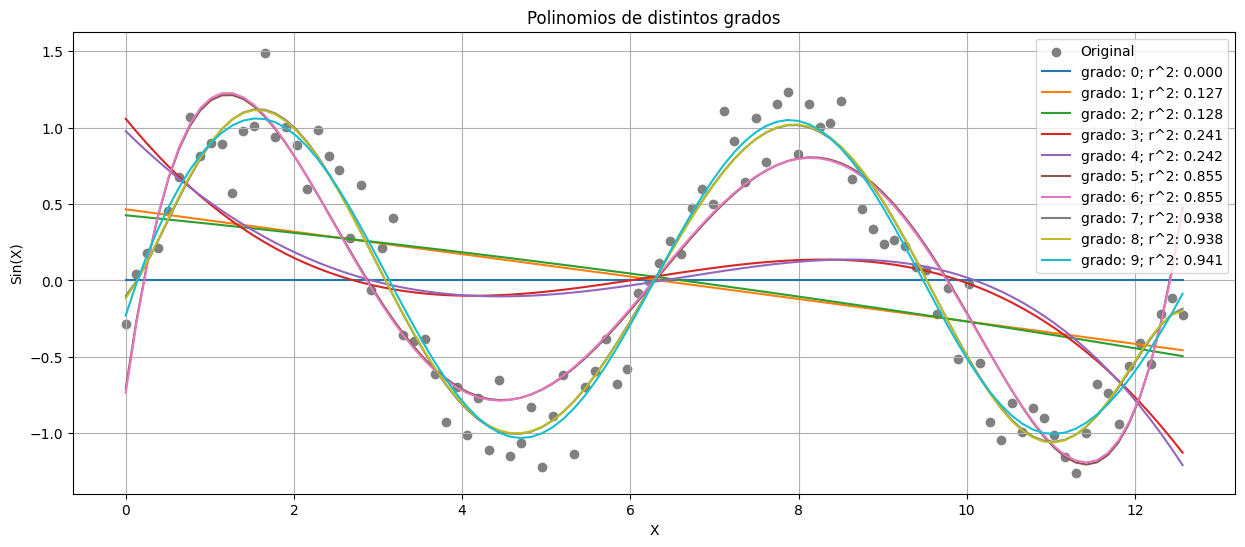

In [28]:
# Mostrar diversos polinomios
plt.figure(figsize=(15, 6))

# Datos std
plt.scatter(X_trig, y_trig, color="gray", label="Original")
plt.title("Polinomios de distintos grados")
plt.xlabel("X")
plt.ylabel("Sin(X)")
plt.grid(True)


for grado in range(10):
    
    model_p = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
    
    # Entrenar
    model_p.fit(X_trig, y_trig)
    
    y_pred = model_p.predict(X_trig)
    
    plt.plot(X_trig, y_pred, label=f"grado: {grado}; r^2: {r2_score(y_trig, y_pred):.3f}")
    
plt.legend()
plt.show()

In [29]:
grado = 5
model_p = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
model_l = LinearRegression()

# Entrenar
model_p.fit(days, y_retail)
model_l.fit(days, y_retail)

# Predicción
y_pred_p = model_p.predict(days)
y_pred_l = model_l.predict(days)

# Mostrar las estadisticas
print(" Modelo Lineal ".center(45, "*"))
print(f"rMSE: {root_mean_squared_error(y_retail, y_pred_l)}")
print(f"R^2: {r2_score(y_retail, y_pred_l)}")
print(" Modelo Polinómico ".center(45, "="))
print(f"rMSE: {root_mean_squared_error(y_retail, y_pred_p)}")
print(f"R^2: {r2_score(y_retail, y_pred_p)}")

*************** Modelo Lineal ***************
rMSE: 8.745966481530873
R^2: 0.012608316253909346
============= Modelo Polinómico =============
rMSE: 6.46344245735225
R^2: 0.46073576089641577


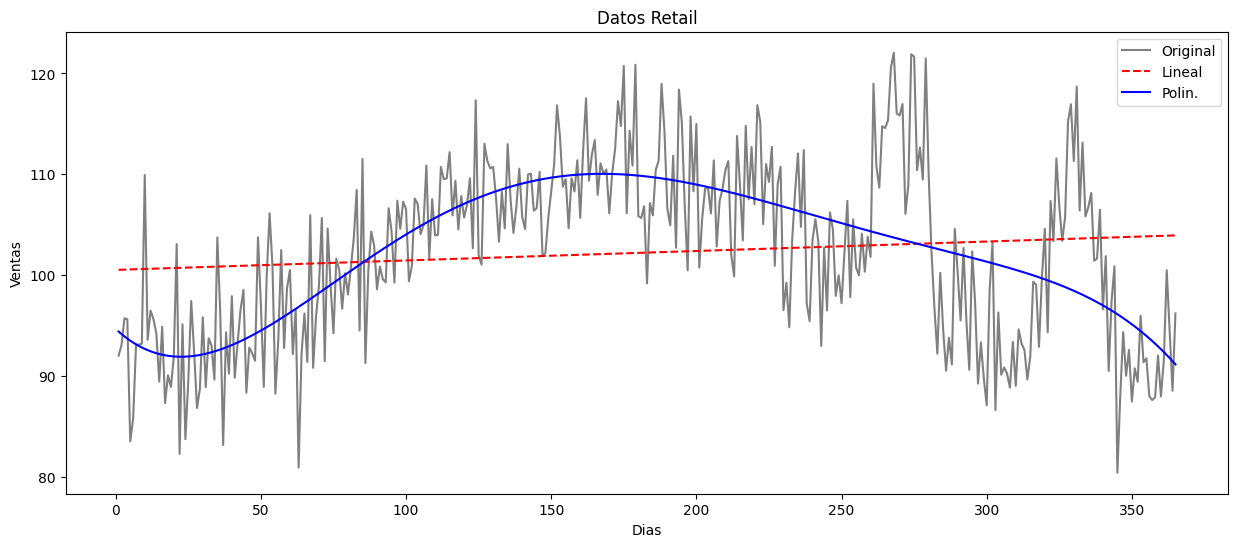

In [34]:
# Graficar
plt.figure(figsize=(15, 6))

# Visualizacion
plt.plot(days, y_retail, color="gray", label="Original")
plt.plot(days, y_pred_l, color="r", linestyle="--", label="Lineal")
plt.plot(days, y_pred_p, color="b", linestyle="-", label="Polin.")
plt.title("Datos Retail")
plt.xlabel("Dias")
plt.ylabel("Ventas")
plt.legend()
plt.show()

C:\Users\07020\AppData\Local\Temp\ipykernel_14928\1747310520.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


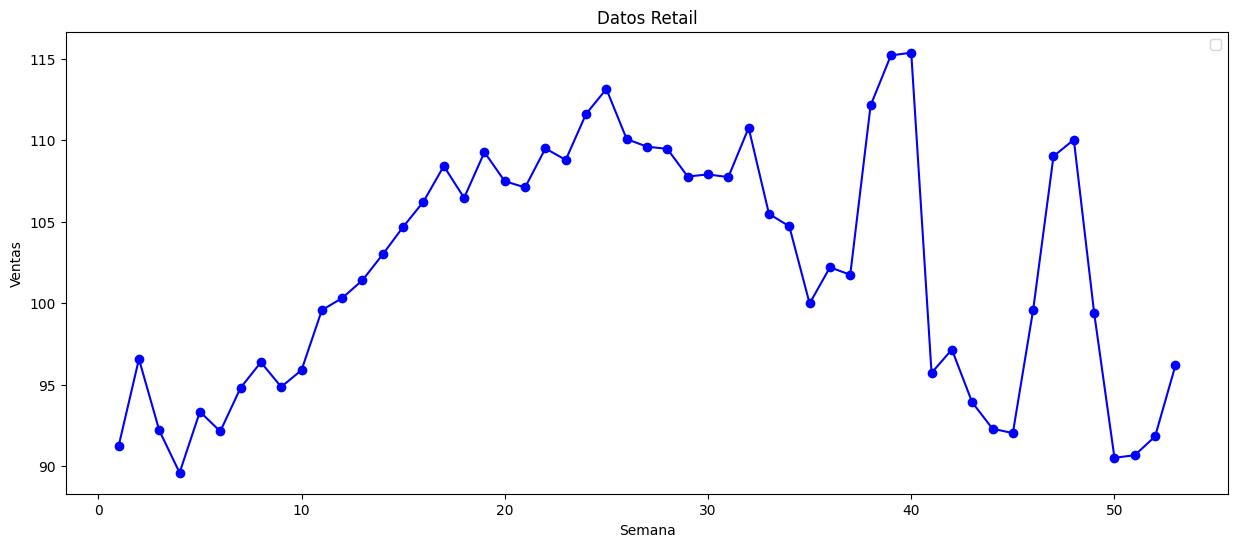

In [36]:
# Simplificamos el modelo por semanas
semanas = np.arange(1, 54).reshape(-1, 1)
# Agrupamos los datos y_retail
ventas_semana = [np.mean(y_retail[i:i+7]) for i in range(0, len(days), 7)]
ventas_semana = np.array(ventas_semana).reshape(-1, 1)

# Graficar
# Graficar
plt.figure(figsize=(15, 6))

# Visualizacion
plt.plot(semanas, ventas_semana, "bo-")
plt.title("Datos Retail")
plt.xlabel("Semana")
plt.ylabel("Ventas")
plt.legend()
plt.show()

In [37]:
# Ahora realizamos otro entrenamiento
grado = 5
model_p = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
model_l = LinearRegression()

# Entrenamos
model_p.fit(semanas, ventas_semana)
model_l.fit(semanas, ventas_semana)

y_pred_l = model_l.predict(semanas)
y_pred_p = model_p.predict(semanas)

print(" Modelo Lineal ".center(35, "*"))
print(f"rMSE: {root_mean_squared_error(ventas_semana, y_pred_l)}")
print(f"R^2: {r2_score(ventas_semana, y_pred_l)}\n")
print(" Modelo Polinomico ".center(35, "#"))
print(f"rMSE: {root_mean_squared_error(ventas_semana, y_pred_p)}")
print(f"R^2: {r2_score(ventas_semana, y_pred_p)}")

********** Modelo Lineal **********
rMSE: 7.40716249331071
R^2: 0.01130763900212417

######## Modelo Polinomico ########
rMSE: 4.491257364888349
R^2: 0.6365092869605026


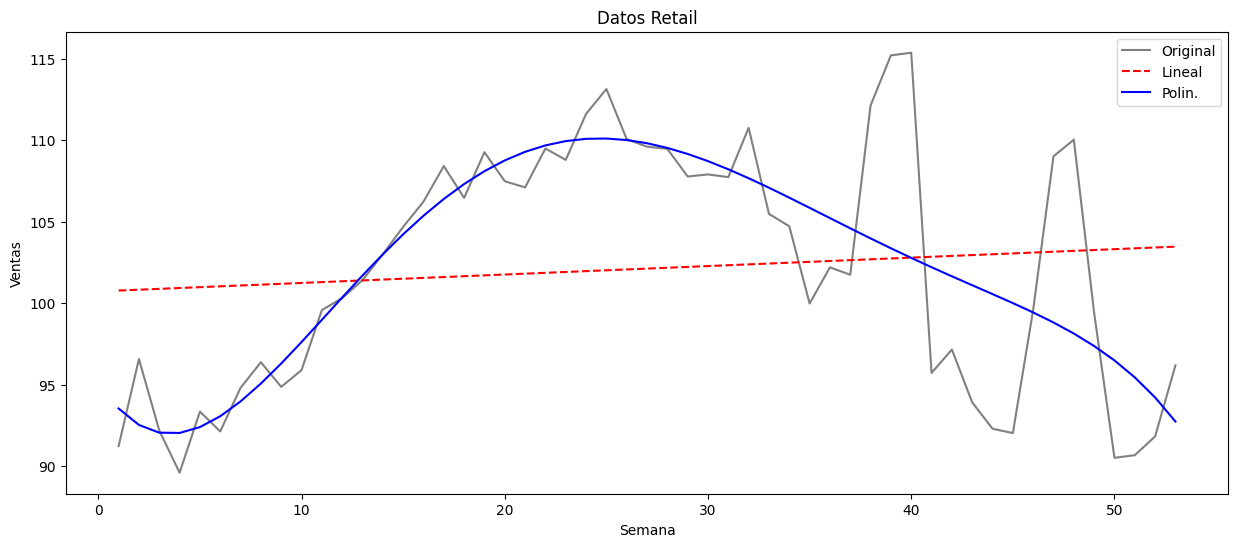

In [39]:
# Graficar
plt.figure(figsize=(15, 6))

# Visualizacion
plt.plot(semanas, ventas_semana, color="gray", label="Original")
plt.plot(semanas, y_pred_l, color="r", linestyle="--", label="Lineal")
plt.plot(semanas, y_pred_p, color="b", linestyle="-", label="Polin.")
plt.title("Datos Retail")
plt.xlabel("Semana")
plt.ylabel("Ventas")
plt.legend()
plt.show()

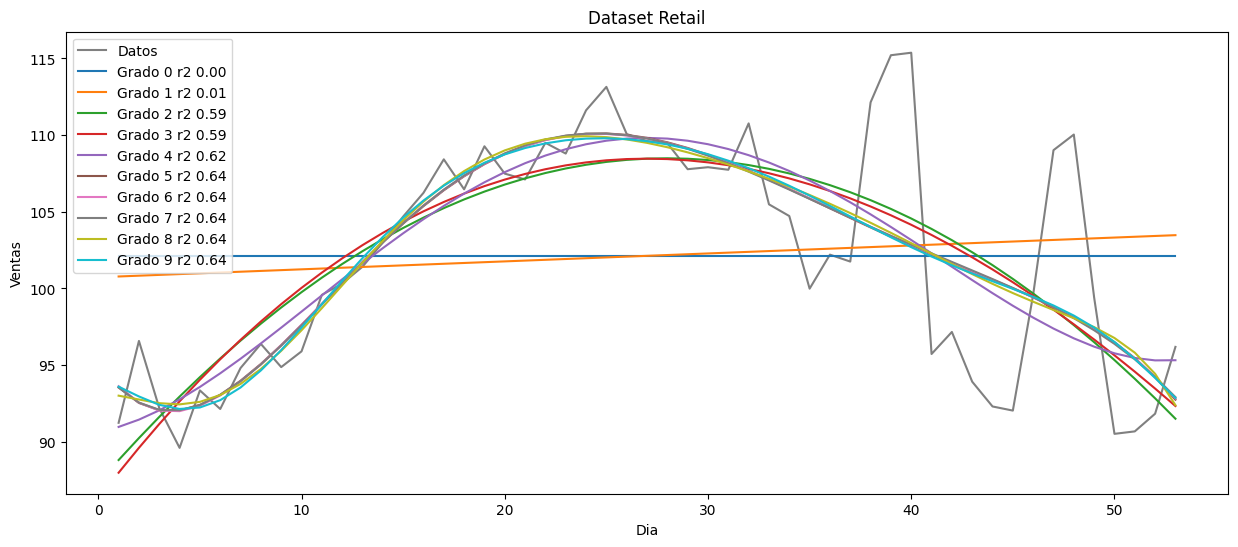

In [40]:
# Visualización del dataset polinómico
plt.figure(figsize=(15, 6))
plt.plot(semanas, ventas_semana, color="gray", label="Datos")

# Ahora realizamos otro entrenamiento
for grado in range(10):

    model_p = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())

    # Entrenamos
    model_p.fit(semanas, ventas_semana)
    model_l.fit(semanas, ventas_semana)

    y_pred_l = model_l.predict(semanas)
    y_pred_p = model_p.predict(semanas)

    plt.plot(semanas, y_pred_p, linestyle="-", label=f"Grado {grado} r2 {r2_score(ventas_semana, y_pred_p):.2f}")

plt.title('Dataset Retail')
plt.xlabel('Dia')
plt.ylabel('Ventas')
plt.legend();